<a href="https://colab.research.google.com/github/Sonypriyasonu/VITBML-EDA1/blob/master/VITBML-EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Description**

The dataset is MAGIC gamma telescope data 2004

**Dataset information.**

The data are MC generated (see below) to simulate registration of high energy
gamma particles in a ground-based atmospheric Cherenkov gamma telescope using the
imaging technique. Cherenkov gamma telescope observes high energy gamma rays,
taking advantage of the radiation emitted by charged particles produced
inside the electromagnetic showers initiated by the gammas, and developing in the
atmosphere. This Cherenkov radiation (of visible to UV wavelengths) leaks
through the atmosphere and gets recorded in the detector, allowing reconstruction
of the shower parameters. The available information consists of pulses left by
the incoming Cherenkov photons on the photomultiplier tubes, arranged in a
plane, the camera. Depending on the energy of the primary gamma, a total of
few hundreds to some 10000 Cherenkov photons get collected, in patterns
(called the shower image), allowing to discriminate statistically those
caused by primary gammas (signal) from the images of hadronic showers
initiated by cosmic rays in the upper atmosphere (background).

Typically, the image of a shower after some pre-processing is an elongated
cluster. Its long axis is oriented towards the camera center if the shower axis
is parallel to the telescope's optical axis, i.e. if the telescope axis is
directed towards a point source. A principal component analysis is performed
in the camera plane, which results in a correlation axis and defines an ellipse.
If the depositions were distributed as a bivariate Gaussian, this would be
an equidensity ellipse. The characteristic parameters of this ellipse
(often called Hillas parameters) are among the image parameters that can be
used for discrimination. The energy depositions are typically asymmetric
along the major axis, and this asymmetry can also be used in discrimination.
There are, in addition, further discriminating characteristics, like the
extent of the cluster in the image plane, or the total sum of depositions.

The data set was generated by a Monte Carlo program, Corsika, described in
D. Heck et al., CORSIKA, A Monte Carlo code to simulate extensive air showers,
Forschungszentrum Karlsruhe FZKA 6019 (1998).
The program was run with parameters allowing to observe events with energies down
to below 50 GeV.

Number of Instances: 19020

Number of Attributes: 11 (including the class)

Attribute information:

1.  fLength:  continuous  -  major axis of ellipse [mm]
2.  fWidth:   continuous  - minor axis of ellipse [mm] 
3.  fSize:    continuous  - 10-log of sum of content of all pixels [in #phot]
4.  fConc:    continuous  - ratio of sum of two highest pixels over fSize  [ratio]
5.  fConc1:   continuous  - ratio of highest pixel over fSize  [ratio]
6.  fAsym:    continuous  - distance from highest pixel to center, projected onto major axis [mm]
7.  fM3Long:  continuous  - 3rd root of third moment along major axis  [mm] 
8.  fM3Trans: continuous  - 3rd root of third moment along minor axis  [mm]
9.  fAlpha:   continuous  - angle of major axis with vector to origin [deg]
10.  fDist:    continuous  - distance from origin to center of ellipse [mm]
11.  class:    g,h  - gamma (signal), hadron (background)




# Reading data:

In [0]:
#reading data
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('/content/telescope_data.csv')
print(df.shape)


(19020, 12)


In [0]:
#To find the first five rows of the given dataset
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('/content/telescope_data.csv')
print(df.head)

<bound method NDFrame.head of        Unnamed: 0   fLength    fWidth  ...   fAlpha     fDist  class
0               0   28.7967   16.0021  ...  40.0920   81.8828      g
1               1   31.6036   11.7235  ...   6.3609  205.2610      g
2               2  162.0520  136.0310  ...  76.9600  256.7880      g
3               3   23.8172    9.5728  ...  10.4490  116.7370      g
4               4   75.1362   30.9205  ...   4.6480  356.4620      g
...           ...       ...       ...  ...      ...       ...    ...
11779       11779   42.0531   11.5287  ...   8.7922  217.5220      g
11780       11780   35.8471   17.9053  ...   4.1110  204.9620      g
11781       11781   79.4369   16.6114  ...   2.8484  290.6190      g
11782       11782   67.2332   22.0694  ...   7.8252  246.0130      g
11783           1       NaN       NaN  ...      NaN       NaN    NaN

[11784 rows x 12 columns]>


In [0]:
#to find the last five rows of the given dataset
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('/content/telescope_data.csv')
print(df.tail)

<bound method NDFrame.tail of        Unnamed: 0   fLength    fWidth  ...   fAlpha     fDist  class
0               0   28.7967   16.0021  ...  40.0920   81.8828      g
1               1   31.6036   11.7235  ...   6.3609  205.2610      g
2               2  162.0520  136.0310  ...  76.9600  256.7880      g
3               3   23.8172    9.5728  ...  10.4490  116.7370      g
4               4   75.1362   30.9205  ...   4.6480  356.4620      g
...           ...       ...       ...  ...      ...       ...    ...
11779       11779   42.0531   11.5287  ...   8.7922  217.5220      g
11780       11780   35.8471   17.9053  ...   4.1110  204.9620      g
11781       11781   79.4369   16.6114  ...   2.8484  290.6190      g
11782       11782   67.2332   22.0694  ...   7.8252  246.0130      g
11783           1       NaN       NaN  ...      NaN       NaN    NaN

[11784 rows x 12 columns]>


In [0]:
#to know the names of the given coloumns
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('/content/telescope_data.csv')
print(df.columns)

Index(['Unnamed: 0', 'fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym',
       'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class'],
      dtype='object')


In [34]:
df.dtypes

Unnamed: 0      int64
fLength       float64
fWidth        float64
fSize         float64
fConc         float64
fConc1        float64
fAsym         float64
fM3Long       float64
fM3Trans      float64
dtype: object

In [35]:
df.mean

<bound method DataFrame.mean of        Unnamed: 0   fLength    fWidth  ...     fAsym  fM3Long  fM3Trans
0               0   28.7967   16.0021  ...   27.7004  22.0110   -8.2027
1               1   31.6036   11.7235  ...   26.2722  23.8238   -9.9574
2               2  162.0520  136.0310  ...  116.7410 -64.8580  -45.2160
3               3   23.8172    9.5728  ...   27.2107  -6.4633   -7.1513
4               4   75.1362   30.9205  ...   -5.5277  28.5525   21.8393
...           ...       ...       ...  ...       ...      ...       ...
11778       11778   13.2042   10.6386  ...  -13.9224  -3.9545   11.2903
11779       11779   42.0531   11.5287  ...   29.2615  32.9873    7.3260
11780       11780   35.8471   17.9053  ...    8.2472  24.8861    9.0144
11781       11781   79.4369   16.6114  ...  -50.5703  29.9081  -16.1259
11782       11782   67.2332   22.0694  ...  -86.4397  62.9753  -17.3832

[11783 rows x 9 columns]>

In [36]:
df.median

<bound method DataFrame.median of        Unnamed: 0   fLength    fWidth  ...     fAsym  fM3Long  fM3Trans
0               0   28.7967   16.0021  ...   27.7004  22.0110   -8.2027
1               1   31.6036   11.7235  ...   26.2722  23.8238   -9.9574
2               2  162.0520  136.0310  ...  116.7410 -64.8580  -45.2160
3               3   23.8172    9.5728  ...   27.2107  -6.4633   -7.1513
4               4   75.1362   30.9205  ...   -5.5277  28.5525   21.8393
...           ...       ...       ...  ...       ...      ...       ...
11778       11778   13.2042   10.6386  ...  -13.9224  -3.9545   11.2903
11779       11779   42.0531   11.5287  ...   29.2615  32.9873    7.3260
11780       11780   35.8471   17.9053  ...    8.2472  24.8861    9.0144
11781       11781   79.4369   16.6114  ...  -50.5703  29.9081  -16.1259
11782       11782   67.2332   22.0694  ...  -86.4397  62.9753  -17.3832

[11783 rows x 9 columns]>

In [37]:
df.mode

<bound method DataFrame.mode of        Unnamed: 0   fLength    fWidth  ...     fAsym  fM3Long  fM3Trans
0               0   28.7967   16.0021  ...   27.7004  22.0110   -8.2027
1               1   31.6036   11.7235  ...   26.2722  23.8238   -9.9574
2               2  162.0520  136.0310  ...  116.7410 -64.8580  -45.2160
3               3   23.8172    9.5728  ...   27.2107  -6.4633   -7.1513
4               4   75.1362   30.9205  ...   -5.5277  28.5525   21.8393
...           ...       ...       ...  ...       ...      ...       ...
11778       11778   13.2042   10.6386  ...  -13.9224  -3.9545   11.2903
11779       11779   42.0531   11.5287  ...   29.2615  32.9873    7.3260
11780       11780   35.8471   17.9053  ...    8.2472  24.8861    9.0144
11781       11781   79.4369   16.6114  ...  -50.5703  29.9081  -16.1259
11782       11782   67.2332   22.0694  ...  -86.4397  62.9753  -17.3832

[11783 rows x 9 columns]>

In [38]:
print(df)

       Unnamed: 0   fLength    fWidth  ...     fAsym  fM3Long  fM3Trans
0               0   28.7967   16.0021  ...   27.7004  22.0110   -8.2027
1               1   31.6036   11.7235  ...   26.2722  23.8238   -9.9574
2               2  162.0520  136.0310  ...  116.7410 -64.8580  -45.2160
3               3   23.8172    9.5728  ...   27.2107  -6.4633   -7.1513
4               4   75.1362   30.9205  ...   -5.5277  28.5525   21.8393
...           ...       ...       ...  ...       ...      ...       ...
11778       11778   13.2042   10.6386  ...  -13.9224  -3.9545   11.2903
11779       11779   42.0531   11.5287  ...   29.2615  32.9873    7.3260
11780       11780   35.8471   17.9053  ...    8.2472  24.8861    9.0144
11781       11781   79.4369   16.6114  ...  -50.5703  29.9081  -16.1259
11782       11782   67.2332   22.0694  ...  -86.4397  62.9753  -17.3832

[11783 rows x 9 columns]


In [39]:
df.head()

,Unnamed: 0,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans
0,0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027
1,1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574
2,2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160
3,3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513
4,4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393


In [40]:
df['fLength'].max()

272.063

In [41]:
df['fAsym'].mode()

0    0.0
dtype: float64

In [43]:
df['fM3Long'].head()

0    22.0110
1    23.8238
2   -64.8580
3    -6.4633
4    28.5525
Name: fM3Long, dtype: float64

In [0]:
#To drop the coloumns in the given dataset
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('/content/telescope_data.csv')
df = df.drop(['fAlpha', 'fDist','class'], axis=1)
print(df)

       Unnamed: 0   fLength    fWidth  ...     fAsym  fM3Long  fM3Trans
0               0   28.7967   16.0021  ...   27.7004  22.0110   -8.2027
1               1   31.6036   11.7235  ...   26.2722  23.8238   -9.9574
2               2  162.0520  136.0310  ...  116.7410 -64.8580  -45.2160
3               3   23.8172    9.5728  ...   27.2107  -6.4633   -7.1513
4               4   75.1362   30.9205  ...   -5.5277  28.5525   21.8393
...           ...       ...       ...  ...       ...      ...       ...
11779       11779   42.0531   11.5287  ...   29.2615  32.9873    7.3260
11780       11780   35.8471   17.9053  ...    8.2472  24.8861    9.0144
11781       11781   79.4369   16.6114  ...  -50.5703  29.9081  -16.1259
11782       11782   67.2332   22.0694  ...  -86.4397  62.9753  -17.3832
11783           1       NaN       NaN  ...       NaN      NaN       NaN

[11784 rows x 9 columns]


In [0]:
#To delete rows having missing data 
import pandas as pd
from matplotlib import pyplot as plt
df=pd.read_csv('/content/telescope_data.csv')
df = df.drop(['fAlpha', 'fDist','class'], axis=1)
df=df.dropna(axis=0,how='any',thresh=None,subset=None,inplace=False)
print(df)

       Unnamed: 0   fLength    fWidth  ...     fAsym  fM3Long  fM3Trans
0               0   28.7967   16.0021  ...   27.7004  22.0110   -8.2027
1               1   31.6036   11.7235  ...   26.2722  23.8238   -9.9574
2               2  162.0520  136.0310  ...  116.7410 -64.8580  -45.2160
3               3   23.8172    9.5728  ...   27.2107  -6.4633   -7.1513
4               4   75.1362   30.9205  ...   -5.5277  28.5525   21.8393
...           ...       ...       ...  ...       ...      ...       ...
11778       11778   13.2042   10.6386  ...  -13.9224  -3.9545   11.2903
11779       11779   42.0531   11.5287  ...   29.2615  32.9873    7.3260
11780       11780   35.8471   17.9053  ...    8.2472  24.8861    9.0144
11781       11781   79.4369   16.6114  ...  -50.5703  29.9081  -16.1259
11782       11782   67.2332   22.0694  ...  -86.4397  62.9753  -17.3832

[11783 rows x 9 columns]


In [0]:
print(df.shape)

(11783, 9)


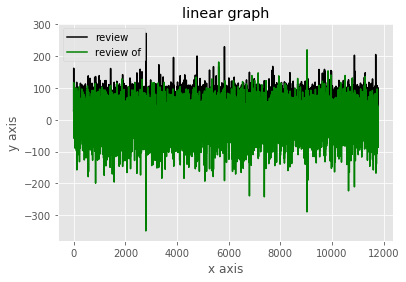

In [44]:
p=df['fLength']
q=df['fAsym']
plt.plot(p,label='review',color='k')
plt.plot(q,label='review of',color='g')
plt.title('linear graph')
plt.xlabel("x axis")
plt.ylabel("y axis")
plt.legend()
plt.show()

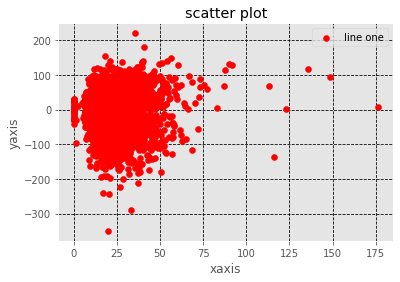

In [48]:
a=df['fWidth']
b=df['fAsym']
plt.scatter(a,b,label='line one',color='r',marker='o')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc='upper right')
plt.title('scatter plot')
plt.grid(True,color='k',linestyle='--')
plt.show()

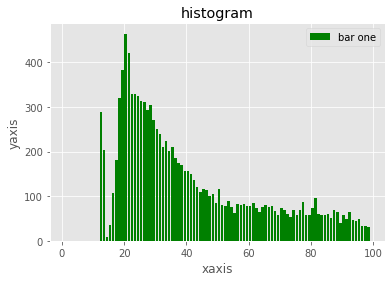

In [49]:
a=df['fLength']
c=range(1,100)
plt.hist(a,c,label='bar one',rwidth=0.8,color='g')
plt.title('histogram')
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.legend(loc='upper right')
plt.show()


#From the above graph we conclude that, it indicates the positive skewness between the fLength and rWidth

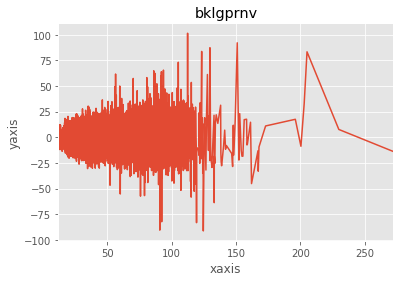

In [51]:
bklgprnv=df.groupby('fLength')['fM3Trans'].mean()
bklgprnv.plot()
plt.xlabel('xaxis')
plt.ylabel('yaxis')
plt.title('bklgprnv')
plt.show()

**OUTLIERS:**

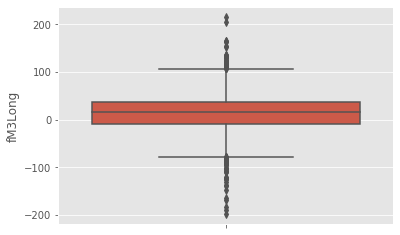

In [50]:
import seaborn as sns
ax=sns.boxplot(y=df['fM3Long'])
